In [2]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Vitualization
import seaborn as sns

# transformation
import scipy

import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

# for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# data prepossessing, PCA , kmean and Hierarchy dependencies
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, normalize

# features engineering
from sklearn.preprocessing import PolynomialFeatures

# gradient boost decision trees
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

In [3]:
# load dataset
Train_data = pd.read_csv("ML/application_train.csv")
"""Test_data = pd.read_csv("ML/application_test.csv")
Bureau_data = pd.read_csv("ML/bureau_balance.csv")
creditcard_data = pd.read_csv("ML/credit_card_balance.csv")
POS_data = pd.read_csv("ML/POS_CASH_balance.csv")"""


'Test_data = pd.read_csv("ML/application_test.csv")\nBureau_data = pd.read_csv("ML/bureau_balance.csv")\ncreditcard_data = pd.read_csv("ML/credit_card_balance.csv")\nPOS_data = pd.read_csv("ML/POS_CASH_balance.csv")'

In [4]:
# view application train dataset
Train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# explore the data column type distribution
Train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [6]:
# explore column stat for object type for application_train_data
Train_data.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [7]:
Train_data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<IPython.core.display.Javascript object>


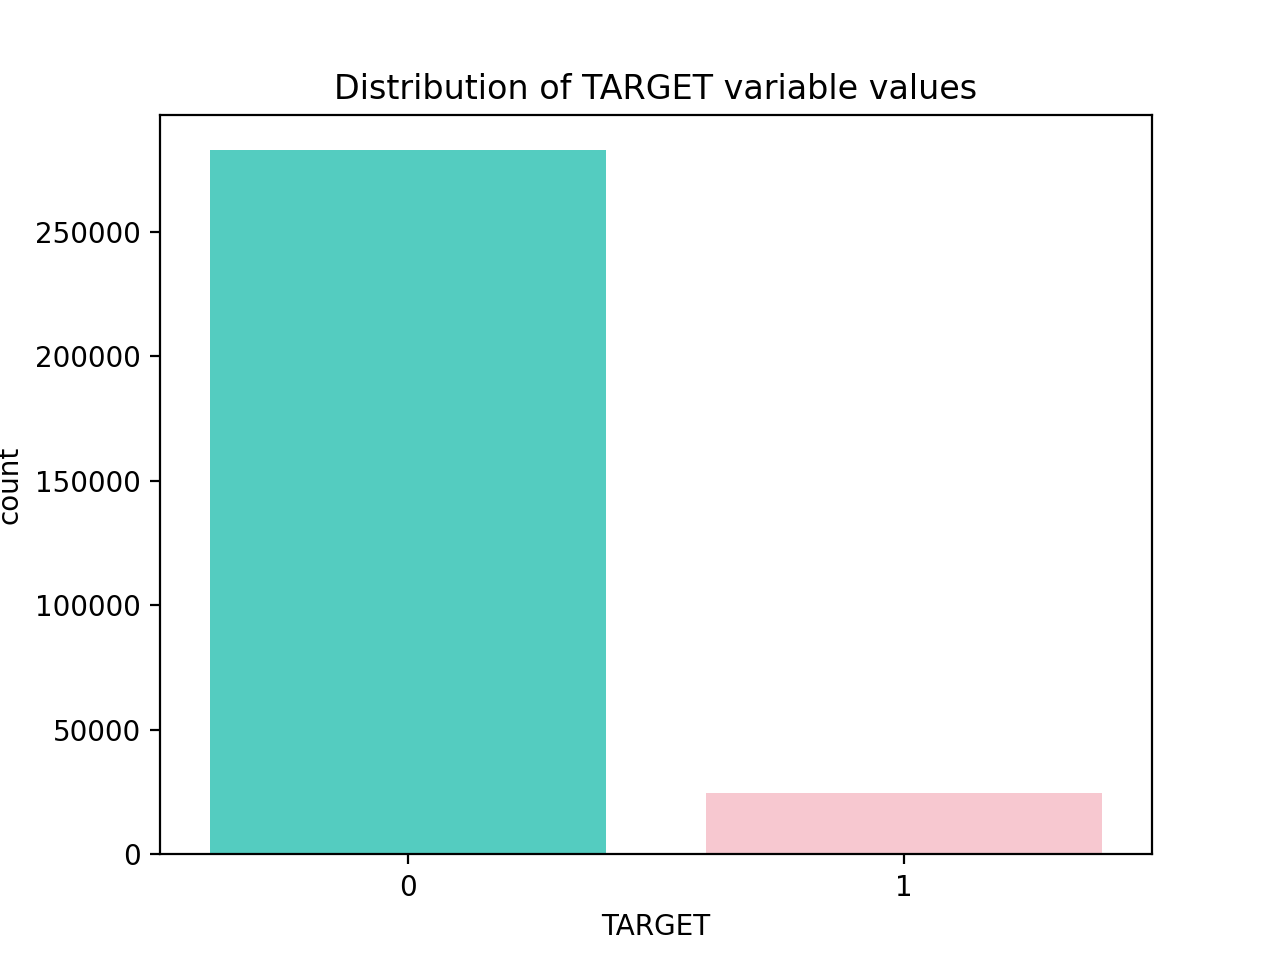

In [8]:
plt.title('Distribution of TARGET variable values')
sns.countplot(x=Train_data.TARGET, palette= ["#40E0D0", "pink"]);

In [9]:
# checking for missing values
count = Train_data.isnull().sum().sort_values(ascending=False)
percentage = ((Train_data.isnull().sum()/len(Train_data)*100)).sort_values(ascending=False)
missing_application = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values for top 20 columns:')
missing_application.head(20)

Count and percentage of missing values for top 20 columns:


,Count,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


Pre-proceesing of Data. These involved removing missing values,re-enginnering time series columns, converting categorical data to numerical and tranforming the data to the form we can use to obtain important features from Random forest

In [10]:
# drop missing data
Train_data = Train_data.dropna()

In [11]:
# checking if all missing values are gone
count = Train_data.isnull().sum().sort_values(ascending=False)
percentage = ((Train_data.isnull().sum()/len(Train_data)*100)).sort_values(ascending=False)
missing_application = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values for top 20 columns:')
missing_application.head(20)

Count and percentage of missing values for top 20 columns:


,Count,Percentage
SK_ID_CURR,0,0.0
OBS_30_CNT_SOCIAL_CIRCLE,0,0.0
WALLSMATERIAL_MODE,0,0.0
TOTALAREA_MODE,0,0.0
HOUSETYPE_MODE,0,0.0
FONDKAPREMONT_MODE,0,0.0
NONLIVINGAREA_MEDI,0,0.0
NONLIVINGAPARTMENTS_MEDI,0,0.0
LIVINGAREA_MEDI,0,0.0
LIVINGAPARTMENTS_MEDI,0,0.0


## Features selection.

In [12]:
# Removing column that has only one unique entry
empty_columns = []
for col in Train_data.columns:
    if len(Train_data[col].unique()) <=1:
        empty_columns.append(col)
    
print(f"There are {len(empty_columns)} columns with just 1 unique value")
print("Removing these from dataset")
Train_data = Train_data.drop(empty_columns, axis = 1)


There are 4 columns with just 1 unique value
Removing these from dataset


In [13]:
# features engineering
Train_data['DAYS_BIRTH'] = Train_data['DAYS_BIRTH']/-365
Train_data['DAYS_ID_PUBLISH'] = Train_data['DAYS_ID_PUBLISH']/-365
Train_data['DAYS_LAST_PHONE_CHANGE']= Train_data['DAYS_LAST_PHONE_CHANGE']/-365
Train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,0,103500.0,573628.5,24435.0,463500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,1,202500.0,260725.5,16789.5,198000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,N,0,202500.0,675000.0,53329.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,N,0,162000.0,263686.5,24781.5,238500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,N,1,225000.0,1019205.0,31032.0,774000.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


In [14]:
# Continous columns will be a good features to first consider for machine learning model
#extract continuous columns
numerical_cols = list(Train_data.select_dtypes(exclude='object').columns)

# continuous  columns are all columns excluding target and flags columns
cont_cols = [col for col in numerical_cols if col!="TARGET" and col[:5]!='FLAG_']
print(f'No. of continuous features = {len(cont_cols)}')

No. of continuous features = 79


In [15]:
# transform categorical data to numerical
object_cols = list(Train_data.select_dtypes('object').columns)
for i in object_cols:
    Train_data[i] = LabelEncoder().fit_transform(Train_data[i])
Train_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              int64
CODE_GENDER                     int64
FLAG_OWN_REALTY                 int64
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 118, dtype: object

In [19]:
#rnd_Train_data = Train_data[numerical_cols]

X = Train_data.drop('TARGET', axis = 1)
y = Train_data.TARGET

#save the feature name and target variables
feature_names = X.columns
labels = y.unique()

In [20]:
# Building random forest model
# split dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes= 16, n_jobs=-1)
model_clf = rnd_clf.fit(X_train, y_train)

y_pred_rf = model_clf.predict(X_test)  

<IPython.core.display.Javascript object>


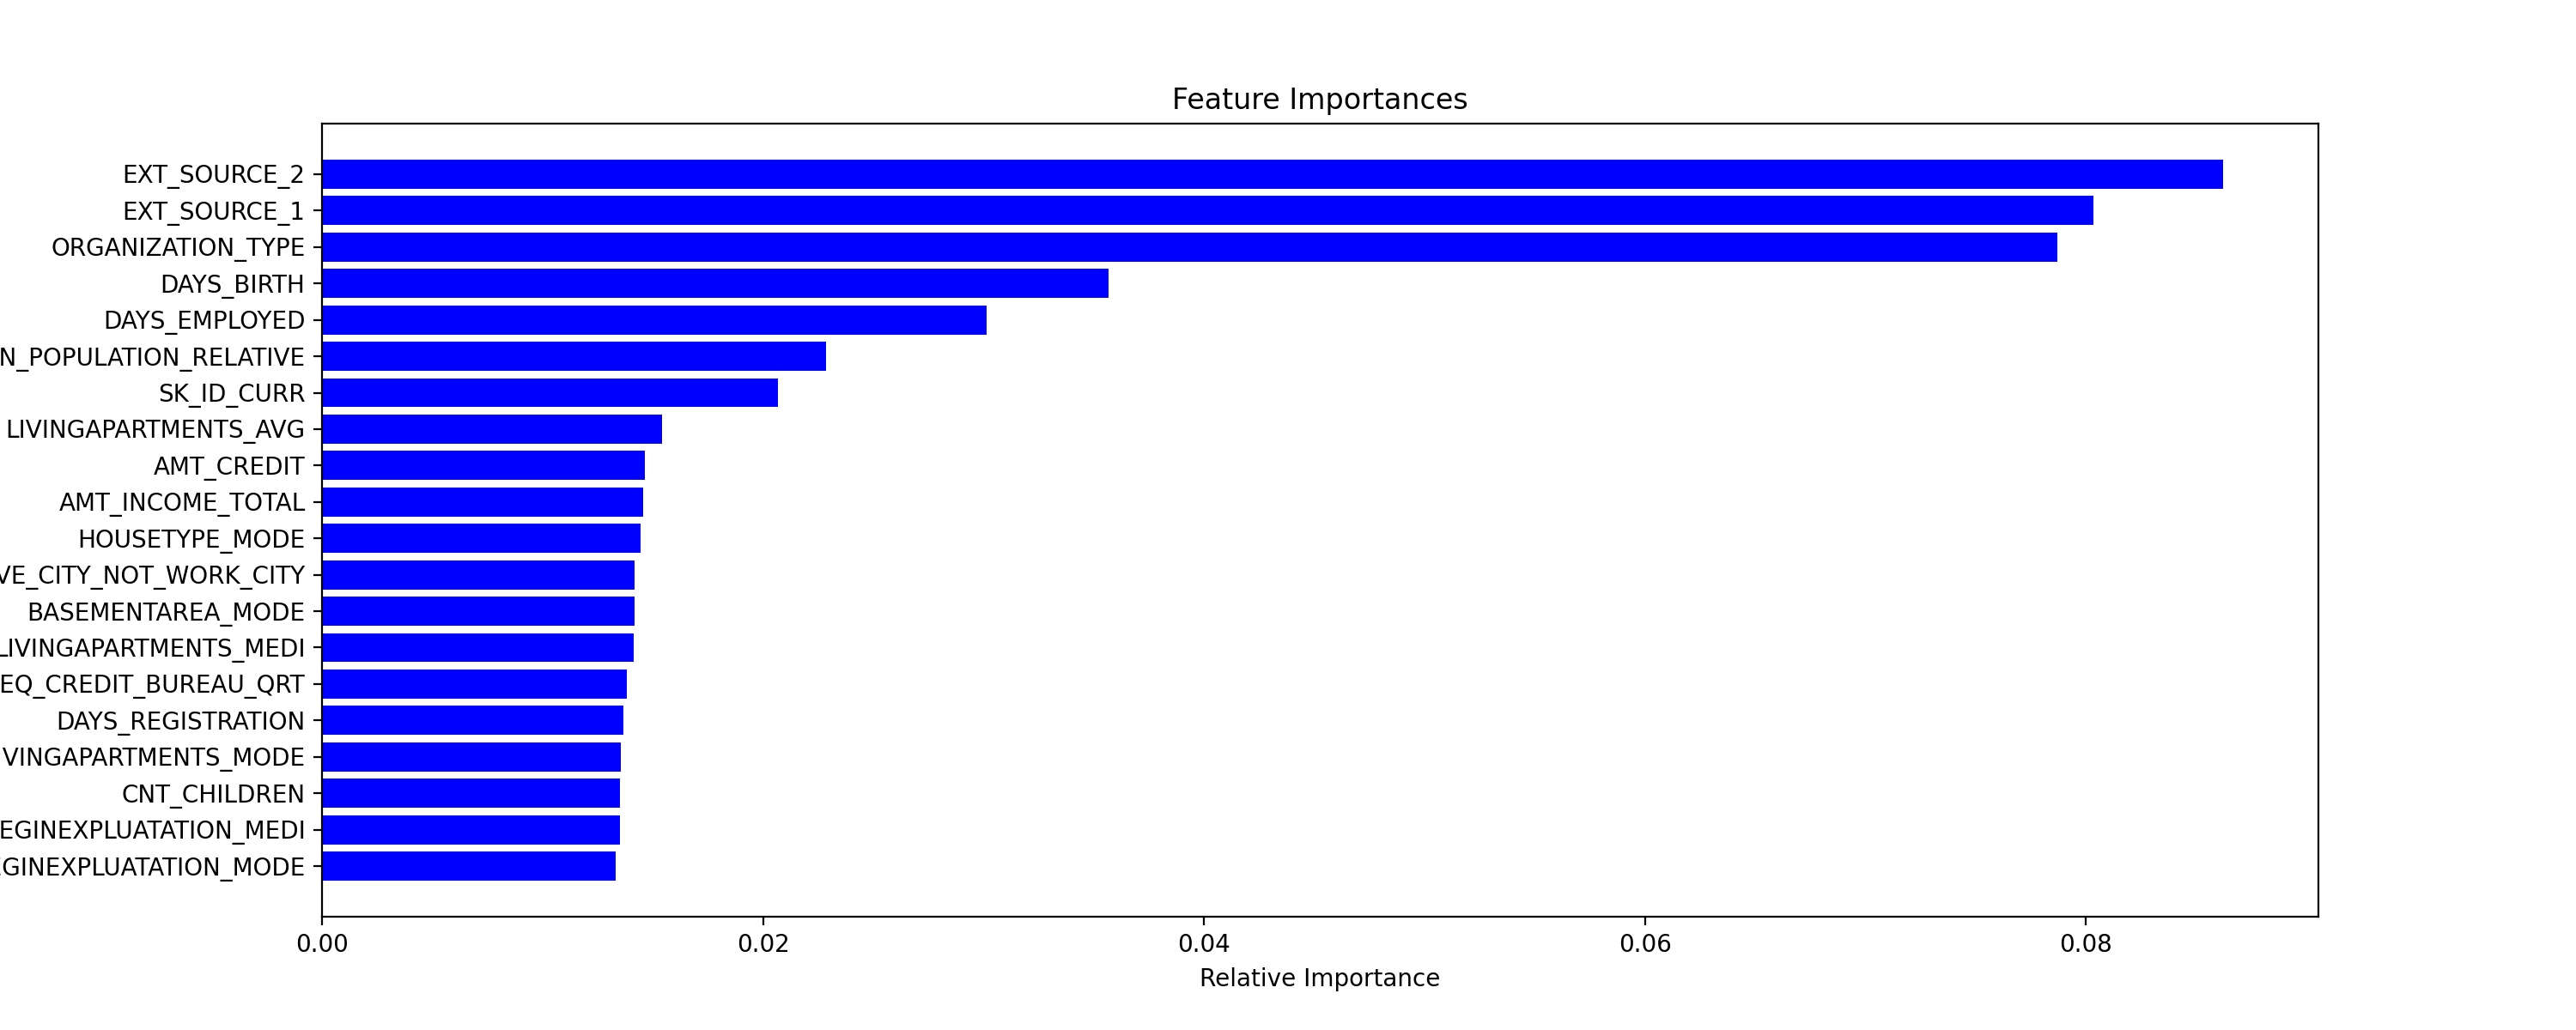

In [22]:
# extract important features from the random forest
# plot top ten important fearture in the random forest model
features = Train_data.columns
importances = model_clf.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 20 

plt.figure(figsize=(15,6))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [127]:
# evaluate training model
def evaluate_model(model_pipeline):
    # prediction
    train_pred = model_pipeline.predict(X_Train_scaled)
    test_pred = model_pipeline.predict(X_Test_scaled)
    
    train_pred_proba = model_pipeline.predict_proba(X_Train_scaled)
    test_pred_proba = model_pipeline.predict_proba(X_Test_scaled)
    
    # evaluations
    print('Training & Validation ROC AUC Scores:\n', '-'*40)
    print('Training   roc auc score= {:.4f}'.format(roc_auc_score(y_train, train_pred_proba[:, 1])))
    print('Validation roc auc score= {:.4f}'.format(roc_auc_score(y_test, test_pred_proba[:, 1])))
    print('')
    print('Training & Validation Confusion Metrices:')
    print('Training   confusion matrix:\n', confusion_matrix(y_train, train_pred))
    print('Validation confusion matrix:\n', confusion_matrix(y_test, test_pred))

In [26]:
imp_features = list([features[i] for i in indices[-num_features:]])

In [27]:
# Build new data set with important features
n_Train_data = Train_data[imp_features]
n_Train_data["AMT_CREDIT"] = Train_data["AMT_CREDIT"]
n_Train_data["TARGET"] = Train_data["TARGET"]
n_Train_data.head()

,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,CNT_CHILDREN,LIVINGAPARTMENTS_MODE,DAYS_REGISTRATION,AMT_REQ_CREDIT_BUREAU_QRT,LIVINGAPARTMENTS_MEDI,BASEMENTAREA_MODE,LIVE_CITY_NOT_WORK_CITY,HOUSETYPE_MODE,...,AMT_CREDIT,LIVINGAPARTMENTS_AVG,SK_ID_CURR,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_BIRTH,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,TARGET
71,0.9861,0.9861,0,0.1304,-341.0,0.0,0.1214,0.1340,0,0,...,573628.5,0.1194,100083,0.009657,-892,42.208219,5,0.270766,0.707126,0
124,0.9801,0.9801,1,0.0826,-762.0,0.0,0.0770,0.1038,0,0,...,260725.5,0.0756,100145,0.018850,-4375,44.608219,41,0.647045,0.746486,0
152,0.9945,0.9945,0,0.4683,-180.0,0.0,0.4361,0.4742,0,0,...,675000.0,0.4287,100179,0.031329,-2311,31.164384,49,0.674832,0.616156,0
161,0.9891,0.9891,0,0.2755,-464.0,0.0,0.2565,0.2047,0,0,...,263686.5,0.2522,100190,0.022625,-4472,38.279452,11,0.534999,0.585859,0
255,0.9916,0.9916,1,0.2121,-335.0,0.0,0.1975,0.1139,0,0,...,1019205.0,0.1942,100295,0.072508,-602,31.112329,5,0.262005,0.302394,1


<IPython.core.display.Javascript object>


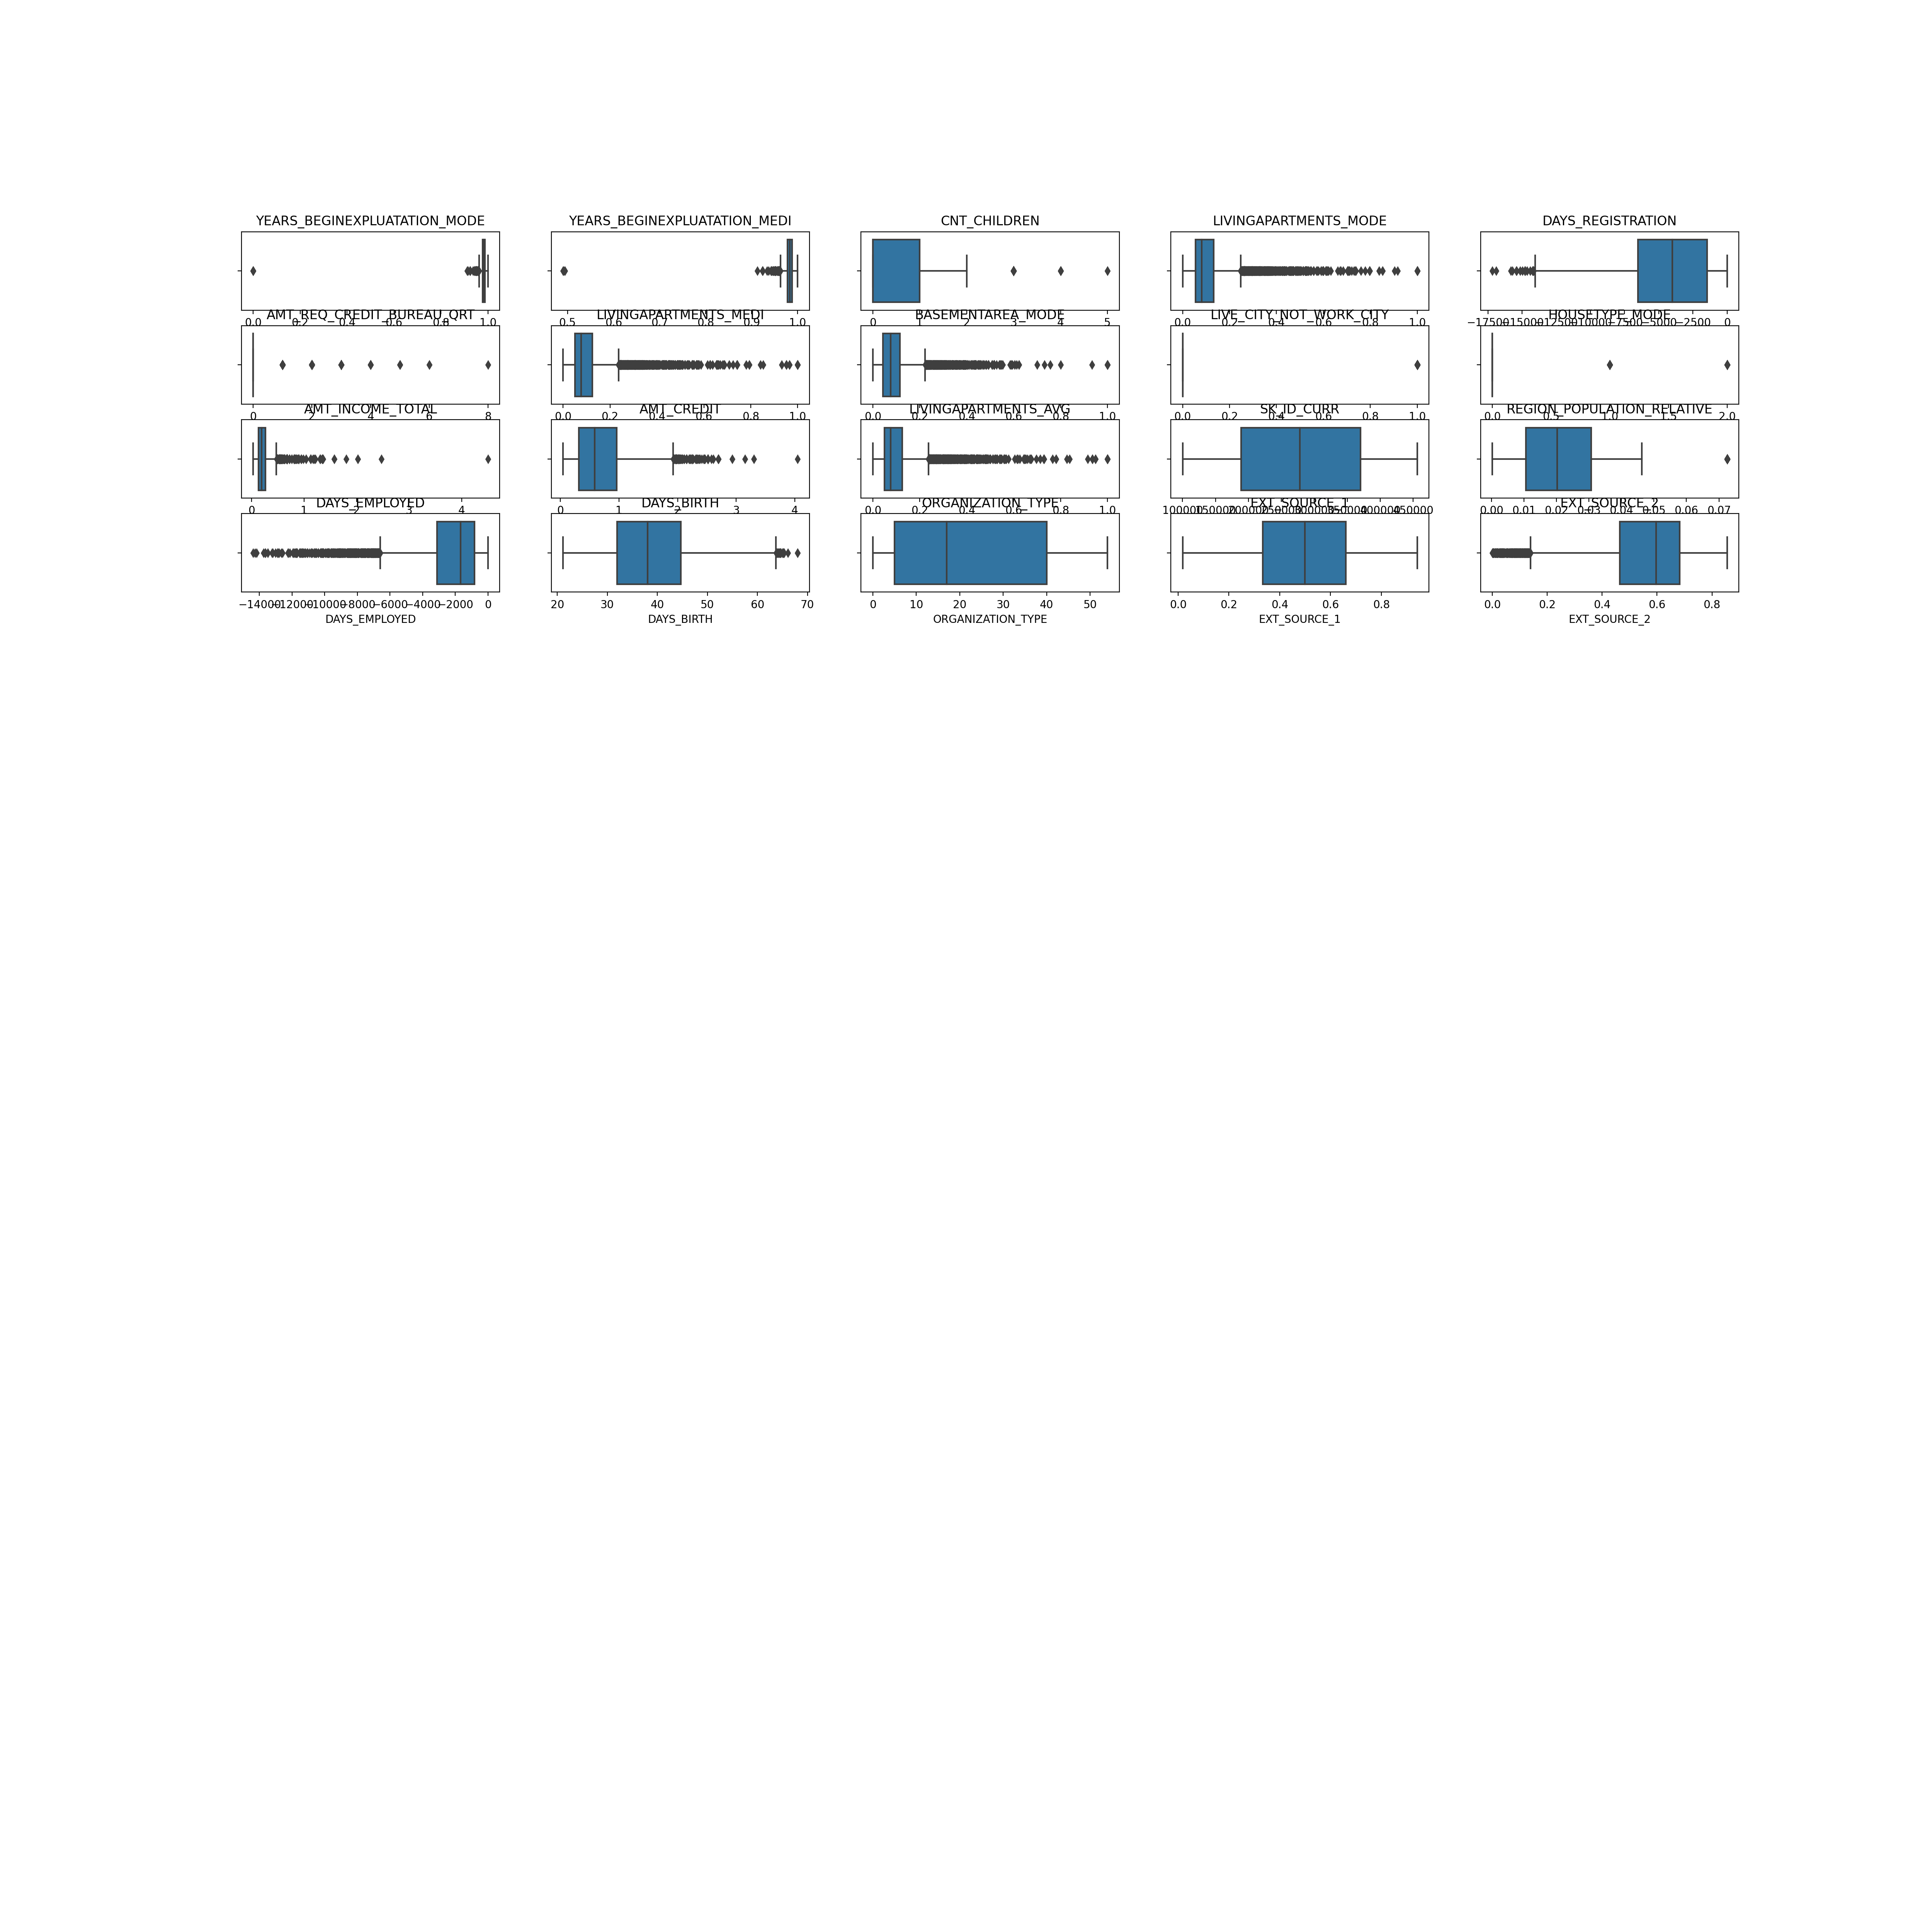

In [28]:
# Checking for possible outliers in the selected features
#draw boxplots for each continuous column
plt.figure(figsize=(25, 25))
for i, col in enumerate(imp_features):
    plt.subplot(16, 5, i+1)
    sns.boxplot(data=n_Train_data, x=col)
    plt.title(col)

### Further Features enginnering : which include income and days employed ratio/percentage, removing outliers from from Days_birth, income total and creating polynomial feratures for the five top important features.

In [185]:
Eng_Train_data = n_Train_data.copy()

In [186]:

# column represent the annuity/income percentage


Eng_Train_data['DAYS_EMPLOYED'] = Eng_Train_data['DAYS_EMPLOYED']/-365

# Days employed to Birth ratio
Eng_Train_data['Employed_to_Birth_Ratio'] = Eng_Train_data['DAYS_EMPLOYED']/Eng_Train_data['DAYS_BIRTH']

# credit to income ratio
Eng_Train_data['Credit_to_Income_Ratio'] = Eng_Train_data['AMT_CREDIT']/Eng_Train_data['AMT_INCOME_TOTAL']

# Average of External sources
Eng_Train_data['avg_external_source'] = (Eng_Train_data['EXT_SOURCE_1'] + Eng_Train_data['EXT_SOURCE_2']) / 2


# flag represents if he's greater than 32 or not
Eng_Train_data['Flag_Greater_32'] = Eng_Train_data['DAYS_BIRTH'].apply(lambda x: 1 if x > 32 else 0)

# flag represents if his employmeny years is greater than 5 or not
Eng_Train_data['Flag_Employment_Greater_5'] = Eng_Train_data['DAYS_EMPLOYED'].apply(lambda x: 1 if x > 5 else 0)

# flag represents if his income is greater than the loan or not
Eng_Train_data['Flag_Income_Greater_Credit'] = Eng_Train_data['AMT_INCOME_TOTAL'] > Eng_Train_data['AMT_CREDIT']

# create polynomial features of the top 5 features with target
#cols = ['DAYS_BIRTH', 'LIVE_CITY_NOT_WORK_CITY',
       #'EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_EMPLOYED']

#for col in cols:
    #for i in [2,3]:
       # Eng_Train_data[f'{col}_power_{i}'] = Eng_Train_data[col] ** i



In [187]:

X = Eng_Train_data.drop('TARGET', axis = 1)
y = Eng_Train_data.TARGET

In [188]:
# Building Gradient boosting random forest model
# split dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)



In [189]:
# Standarize data with StandarScaler
X_Train_scaled = MinMaxScaler().fit_transform(X_train)
X_Test_scaled = MinMaxScaler().fit_transform(X_test)
print(X_Train_scaled[0:5])

#save the feature name and target variables
feature_names = X.columns
labels = y.unique()

[[0.97268634 0.945962   0.         0.124      0.53254541 0.16666667
  0.1154     0.1699     0.         0.         0.07304786 0.43820225
  0.1135     0.02943761 0.34442937 0.03820193 0.65519659 0.62962963
  0.77897015 0.5791902  0.04303623 0.24561025 0.68999166 1.
  0.         0.        ]
 [0.97068534 0.94200317 0.         0.0459     0.91400792 0.
  0.0428     0.0739     0.         0.         0.02770781 0.05617978
  0.042      0.49919555 0.34442937 0.05037924 0.21230356 0.09259259
  0.71770122 0.85293496 0.09499792 0.08036297 0.78873027 0.
  0.         0.        ]
 [0.98609305 0.97248614 0.         0.1028     0.57015603 0.
  0.0958     0.1242     0.         0.         0.04282116 0.04157303
  0.0941     0.77296479 0.20674901 0.24619024 0.49886078 0.90740741
  0.88774353 0.69716666 0.32376554 0.04142209 0.80714613 1.
  1.         1.        ]
 [0.9835918  0.96753761 0.         0.0643     0.61056125 0.
  0.0599     0.0772     0.         0.         0.03073048 0.0538427
  0.0588     0.0840252

In [190]:
# create gradient boosting model
#lgbm = LGBMClassifier(n_estimators=10, num_leaves=36, random_state=42)
lgbm = LGBMClassifier(n_estimators=100, max_depth=1, learning_rate=1, class_weight='balanced', num_leaves =42, random_state=22)

# train model
model3 = lgbm.fit(X_Train_scaled, y_train)

# evaluate model
evaluate_model(model3)

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.8215
Validation roc auc score= 0.6665

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[4670 1779]
 [ 105  327]]
Validation confusion matrix:
 [[1297  330]
 [  54   40]]


In [136]:
model3.fit(X_Train_scaled, y_train, eval_metric='auc', 
          eval_set=[(X_Train_scaled, y_train),(X_Test_scaled, y_test)])

[1]	training's auc: 0.641799	training's binary_logloss: 0.6615	valid_1's auc: 0.630202	valid_1's binary_logloss: 0.659591
[2]	training's auc: 0.655038	training's binary_logloss: 0.648899	valid_1's auc: 0.639241	valid_1's binary_logloss: 0.646071
[3]	training's auc: 0.67986	training's binary_logloss: 0.638993	valid_1's auc: 0.649005	valid_1's binary_logloss: 0.635325
[4]	training's auc: 0.700158	training's binary_logloss: 0.63174	valid_1's auc: 0.658179	valid_1's binary_logloss: 0.626484
[5]	training's auc: 0.702974	training's binary_logloss: 0.627446	valid_1's auc: 0.663366	valid_1's binary_logloss: 0.622686
[6]	training's auc: 0.706037	training's binary_logloss: 0.623966	valid_1's auc: 0.663469	valid_1's binary_logloss: 0.619581
[7]	training's auc: 0.711086	training's binary_logloss: 0.620904	valid_1's auc: 0.671351	valid_1's binary_logloss: 0.613722
[8]	training's auc: 0.718171	training's binary_logloss: 0.617874	valid_1's auc: 0.673111	valid_1's binary_logloss: 0.620666
[9]	training

LGBMClassifier(class_weight='balanced', learning_rate=0.5, max_depth=1,
               num_leaves=42, random_state=22)

## The lgbm model is not good due to possible hyperparameter. Bayesian Optimization Technique can be used to tune the hyperparameters, this works by looking at the results on previous hyperparameters while assigning new hyperparameters. It tries to model on the Cost Function which is dependent on all the hyperparameters.

In [139]:
from bayes_opt import BayesianOptimization

In [144]:
from sklearn.model_selection import KFold

In [191]:
def lgbm_evaluate(**params):
    
    '''
    method for optimization of auc score
    '''
    
    params['num_leaves'] = int(params['num_leaves'])
    params['max_depth'] = int(params['max_depth'])
    # params['n_estimators'] = int(params['n_estimators'])
            
    clf = LGBMClassifier(**params,n_estimators=10000,nthread = -1,random_state=42)

    folds = KFold(n_splits = 2, shuffle = True, random_state = 42)
    
    test_pred_proba = np.zeros(y_train.shape[0])
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_Train_scaled,y_train)):
        train_x, train_y = X_Train_scaled[train_idx], y_train.iloc[train_idx]
        valid_x, valid_y = X_Train_scaled[valid_idx], y_train.iloc[valid_idx]
    

        clf.fit(train_x, train_y, 
             eval_set = [(train_x, train_y), (valid_x, valid_y)], eval_metric = 'auc', 
                verbose = False, early_stopping_rounds = 100)
        
        test_pred_proba[valid_idx] = clf.predict_proba(valid_x, num_iteration = clf.best_iteration_)[:, 1]

    return roc_auc_score(y_train, test_pred_proba)
    
    
params = {'colsample_bytree': (0.8, 1), #the fraction of columns to be randomly samples
          'learning_rate': (.01, .02), 
          'num_leaves': (30, 40),  #max leaf nodes
          'subsample': (0.8, 1),  #fraction of observations to be randomly samples for each tree.
          'max_depth': (1, 10),  #maximum depth of a tree
          'reg_alpha': (.03, .05),  #L1 regularization
          'reg_lambda': (.06, .08), #L2 regularization
         }

bo = BayesianOptimization(lgbm_evaluate, params)
bo.maximize(init_points = 20, n_iter = 4) 
 #init_points exploration points
 #n_iter exploitation(how deep to exploit those points)
 
 

|   iter    |  target   | colsam... | learni... | max_depth | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  1        |  0.6825   |  0.863    |  0.01562  |  1.745    |  36.93    |  0.03178  |  0.07484  |  0.8642   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  2        |  0.6517   |  0.8953   |  0.01912  |  9.047    |  38.55    |  0.04397  |  0.06664  |  0.8178   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  20       |  0.6771   |  0.9228   |  0.01013  |  4.148    |  34.86    |  0.04424  |  0.07917  |  0.9256   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  21       |  0.694    |  0.8      |  0.01     |  2.073    |  33.19    |  0.03     |  0.06     |  1.0      |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  22       |  0.694    |  0.8      |  0.01     |  2.016    |  30.88    |  0.03     |  0.06     |  1.0      |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overr

In [192]:
params_gbm = bo.max['params']
params_gbm['max_depth'] = round(params_gbm['max_depth'])
#params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
params_gbm

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 2,
 'num_leaves': 33.18990642865765,
 'reg_alpha': 0.03,
 'reg_lambda': 0.06,
 'subsample': 1.0}

In [197]:
# create gradient boosting model
#lgbm = LGBMClassifier(n_estimators=10, num_leaves=36, random_state=42)
lgbm = LGBMClassifier(colsample_bytree=0.8,
                              learning_rate= 0.01,
                              max_depth=2,
                              n_estimators=100,
                              num_leaves=33,
                              nthread =-1,
                              reg_alpha= 0.03,
                              reg_lambda= 0.06,
                              subsample=0.99,
                              random_state=42,
                              class_weight='balanced'
                              )
# train model
model6 = lgbm.fit(X_Train_scaled, y_train)

# evaluate model
evaluate_model(model6)

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.7268
Validation roc auc score= 0.6710

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[3694 2755]
 [ 112  320]]
Validation confusion matrix:
 [[946 681]
 [ 30  64]]
